# 城市气候与海洋距离关系的研究

导入包

In [2]:
import sklearn

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

导入数据各个海滨城市数据

In [4]:
ferrara1 = pd.read_csv('./data/ferrara_150715.csv')
ferrara2 = pd.read_csv('./data/ferrara_250715.csv')
ferrara3 = pd.read_csv('./data/ferrara_270615.csv')
ferrara = pd.concat([ferrara1,ferrara2,ferrara3],ignore_index=True) 

In [5]:
torino1 = pd.read_csv('./data/torino_150715.csv')
torino2 = pd.read_csv('./data/torino_250715.csv')
torino3 = pd.read_csv('./data/torino_270615.csv')
torino = pd.concat([torino1,torino2,torino3],ignore_index=True) 

In [6]:
mantova1 = pd.read_csv('./data/mantova_150715.csv')
mantova2 = pd.read_csv('./data/mantova_250715.csv')
mantova3 = pd.read_csv('./data/mantova_270615.csv')
mantova = pd.concat([mantova1,mantova2,mantova3],ignore_index=True) 

In [7]:
milano1 = pd.read_csv('./data/milano_150715.csv')
milano2 = pd.read_csv('./data/milano_250715.csv')
milano3 = pd.read_csv('./data/milano_270615.csv')
milano = pd.concat([milano1,milano2,milano3],ignore_index=True) 

In [8]:
ravenna1 = pd.read_csv('./data/ravenna_150715.csv')
ravenna2 = pd.read_csv('./data/ravenna_250715.csv')
ravenna3 = pd.read_csv('./data/ravenna_270615.csv')
ravenna = pd.concat([ravenna1,ravenna2,ravenna3],ignore_index=True)

In [9]:
asti1 = pd.read_csv('./data/asti_150715.csv')
asti2 = pd.read_csv('./data/asti_250715.csv')
asti3 = pd.read_csv('./data/asti_270615.csv')
asti = pd.concat([asti1,asti2,asti3],ignore_index=True)

In [10]:
bologna1 = pd.read_csv('./data/bologna_150715.csv')
bologna2 = pd.read_csv('./data/bologna_250715.csv')
bologna3 = pd.read_csv('./data/bologna_270615.csv')
bologna = pd.concat([bologna1,bologna2,bologna3],ignore_index=True)

In [11]:
piacenza1 = pd.read_csv('./data/piacenza_150715.csv')
piacenza2 = pd.read_csv('./data/piacenza_250715.csv')
piacenza3 = pd.read_csv('./data/piacenza_270615.csv')
piacenza = pd.concat([piacenza1,piacenza2,piacenza3],ignore_index=True)

In [12]:
cesena1 = pd.read_csv('./data/cesena_150715.csv')
cesena2 = pd.read_csv('./data/cesena_250715.csv')
cesena3 = pd.read_csv('./data/cesena_270615.csv')
cesena = pd.concat([cesena1,cesena2,cesena3],ignore_index=True)

In [13]:
faenza1 = pd.read_csv('./data/faenza_150715.csv')
faenza2 = pd.read_csv('./data/faenza_250715.csv')
faenza3 = pd.read_csv('./data/faenza_270615.csv')
faenza = pd.concat([faenza1,faenza2,faenza3],ignore_index=True)

查看列数

In [16]:
ferrara.head()

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,0,30.44,60,1011.0,moderate rain,1436863096,1.03,180.0,Ferrara,2015-07-14 10:38:16,47
1,1,31.40,58,1011.0,moderate rain,1436866685,1.54,135.0,Ferrara,2015-07-14 11:38:05,47
2,2,31.95,54,1011.0,moderate rain,1436870387,0.51,113.0,Ferrara,2015-07-14 12:39:47,47
3,3,32.06,50,1011.0,moderate rain,1436873989,2.06,90.0,Ferrara,2015-07-14 13:39:49,47
4,4,32.63,49,1010.0,moderate rain,1436877535,1.54,68.0,Ferrara,2015-07-14 14:38:55,47


去除没用的列

In [19]:
# drop 默认删除行 指定axis=1是删除列
ferrara.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
ferrara

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,30.440,60,1011.00,moderate rain,1436863096,1.03,180.00000,Ferrara,2015-07-14 10:38:16,47
1,31.400,58,1011.00,moderate rain,1436866685,1.54,135.00000,Ferrara,2015-07-14 11:38:05,47
2,31.950,54,1011.00,moderate rain,1436870387,0.51,113.00000,Ferrara,2015-07-14 12:39:47,47
3,32.060,50,1011.00,moderate rain,1436873989,2.06,90.00000,Ferrara,2015-07-14 13:39:49,47
4,32.630,49,1010.00,moderate rain,1436877535,1.54,68.00000,Ferrara,2015-07-14 14:38:55,47
5,32.750,48,1010.00,moderate rain,1436881203,1.03,113.00000,Ferrara,2015-07-14 15:40:03,47
6,32.630,49,1010.00,moderate rain,1436884798,1.03,113.00000,Ferrara,2015-07-14 16:39:58,47
7,32.380,49,1009.00,moderate rain,1436888397,2.06,180.00000,Ferrara,2015-07-14 17:39:57,47
8,31.400,50,1009.00,moderate rain,1436891995,2.57,90.00000,Ferrara,2015-07-14 18:39:55,47
9,30.420,52,1009.00,moderate rain,1436895589,2.06,135.00000,Ferrara,2015-07-14 19:39:49,47


In [21]:
%who

DataFrame	 Series	 asti	 asti1	 asti2	 asti3	 bologna	 bologna1	 bologna2	 
bologna3	 cesena	 cesena1	 cesena2	 cesena3	 faenza	 faenza1	 faenza2	 faenza3	 
ferrara	 ferrara1	 ferrara2	 ferrara3	 mantova	 mantova1	 mantova2	 mantova3	 milano	 
milano1	 milano2	 milano3	 np	 pd	 piacenza	 piacenza1	 piacenza2	 piacenza3	 
plt	 ravenna	 ravenna1	 ravenna2	 ravenna3	 sklearn	 torino	 torino1	 torino2	 
torino3	 


In [26]:
# asti.drop('Unnamed: 0',axis=1,inplace=True)
# bologna.drop('Unnamed: 0',axis=1,inplace=True)
# cesena.drop('Unnamed: 0',axis=1,inplace=True)
# faenza.drop('Unnamed: 0',axis=1,inplace=True)
# ferrara.drop('Unnamed: 0',axis=1,inplace=True)
mantova.drop('Unnamed: 0',axis=1,inplace=True)
milano.drop('Unnamed: 0',axis=1,inplace=True)
piacenza.drop('Unnamed: 0',axis=1,inplace=True)
ravenna.drop('Unnamed: 0',axis=1,inplace=True)
torino.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
asti

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,28.05,66,1014,Sky is Clear,1436863176,2.57,42.501,Asti,2015-07-14 10:39:36,315
1,29.51,64,1014,Sky is Clear,1436866759,1.54,263.000,Asti,2015-07-14 11:39:19,315
2,30.39,58,1017,Sky is Clear,1436870510,2.60,100.000,Asti,2015-07-14 12:41:50,315
3,31.10,54,1017,Sky is Clear,1436874098,2.10,90.000,Asti,2015-07-14 13:41:38,315
4,33.23,45,1016,few clouds,1436877645,2.10,120.000,Asti,2015-07-14 14:40:45,315
5,32.95,46,1016,few clouds,1436881329,2.10,110.000,Asti,2015-07-14 15:42:09,315
6,34.31,46,1015,few clouds,1436884929,2.10,100.000,Asti,2015-07-14 16:42:09,315
7,32.47,49,1015,few clouds,1436888513,2.10,100.000,Asti,2015-07-14 17:41:53,315
8,34.28,46,1015,few clouds,1436892132,1.50,100.000,Asti,2015-07-14 18:42:12,315
9,31.41,46,1014,Sky is Clear,1436895723,2.10,240.000,Asti,2015-07-14 19:42:03,315


展示 最高温度 与 离海远近 的关系

In [31]:
ferrara['temp'].max()

33.43000000000001

In [35]:
ferrara['dist'].unique()
ferrara['dist'].iloc[0]

47

In [36]:
# 温度
temps = np.array([
    ferrara['temp'].max(),
    torino['temp'].max(),
    mantova['temp'].max(),
    milano['temp'].max(),
    ravenna['temp'].max(),
    asti['temp'].max(),
    bologna['temp'].max(),
    piacenza['temp'].max(),
    cesena['temp'].max(),
    faenza['temp'].max(),
])
# 按照城市的排序 放着各个城市的最高温度
temps

array([33.43, 34.69, 34.18, 34.81, 32.79, 34.31, 33.85, 33.92, 32.81,
       32.74])

In [37]:
# dist
dists = np.array([
    ferrara['dist'].iloc[0],
    torino['dist'].iloc[0],
    mantova['dist'].iloc[0],
    milano['dist'].iloc[0],
    ravenna['dist'].iloc[0],
    asti['dist'].iloc[0],
    bologna['dist'].iloc[0],
    piacenza['dist'].iloc[0],
    cesena['dist'].iloc[0],
    faenza['dist'].iloc[0],
])
# 按照各个城市的顺序 放着各个城市的海洋的距离
dists

array([ 47, 357, 121, 250,   8, 315,  71, 200,  14,  37], dtype=int64)

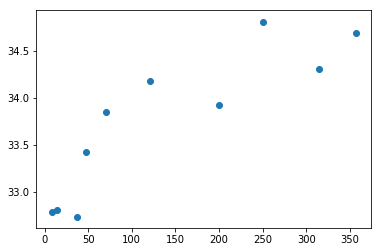

In [38]:
plt.scatter(x=dists,y=temps)

观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

首先使用numpy：把列表转换为numpy数组，用于后续计算。

分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据

使用支持向量机计算回归参数

In [49]:
# near_city <100
# far_city >50
# 获取距离海洋近的城市的距离
# 获取距离海洋近的城市的温度
# dists<100
near_city_dists = dists[dists<100]  # 距离小于100的城市的到海洋的距离
near_city_temps = temps[dists<100]  # 距离小于100的城市的最高温度

far_city_dists = dists[dists>50]  # 距离大于50的城市的到海洋的距离
far_city_temps = temps[dists>50]  # 距离大于50的城市的最高温度

In [41]:
# svm support vector machine 支持向量机 可以用来处理分类问题classification 也 可以用来处理回归问题regression
from sklearn.svm import SVR

In [43]:
svr1 = SVR(kernel='linear')
svr2 = SVR(kernel='linear')

In [51]:
near_city_dists

array([47,  8, 71, 14, 37], dtype=int64)

In [ ]:
# 机器学习模型中传入的数据 需要是二维的 每个样本是一行 样本的各个特征是各个列
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature 
# or array.reshape(1, -1) if it contains a single sample.
near_city_dists.reshape(-1,1)  # -1行1列 意思是 我就要1列 具体多少行 根据size自动计算吧
# reshape
# [1,2,3,4,5,6] reshape(-1,1)  

In [63]:
# 把数据给机器学习模型 让机器学习模型画线 去拟合这些点
svr1.fit(near_city_dists.reshape(-1,1),near_city_temps)
svr2.fit(far_city_dists.reshape(-1,1),far_city_temps)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [64]:
near_city_dists
X_predict = np.linspace(near_city_dists.min(),near_city_dists.max(),100)
X_predict
X2_predict = np.linspace(far_city_dists.min(),far_city_dists.max(),100)
X2_predict

array([ 71.        ,  73.88888889,  76.77777778,  79.66666667,
        82.55555556,  85.44444444,  88.33333333,  91.22222222,
        94.11111111,  97.        ,  99.88888889, 102.77777778,
       105.66666667, 108.55555556, 111.44444444, 114.33333333,
       117.22222222, 120.11111111, 123.        , 125.88888889,
       128.77777778, 131.66666667, 134.55555556, 137.44444444,
       140.33333333, 143.22222222, 146.11111111, 149.        ,
       151.88888889, 154.77777778, 157.66666667, 160.55555556,
       163.44444444, 166.33333333, 169.22222222, 172.11111111,
       175.        , 177.88888889, 180.77777778, 183.66666667,
       186.55555556, 189.44444444, 192.33333333, 195.22222222,
       198.11111111, 201.        , 203.88888889, 206.77777778,
       209.66666667, 212.55555556, 215.44444444, 218.33333333,
       221.22222222, 224.11111111, 227.        , 229.88888889,
       232.77777778, 235.66666667, 238.55555556, 241.44444444,
       244.33333333, 247.22222222, 250.11111111, 253.  

In [66]:
# 使用训练好的模型去预测
y_ = svr1.predict(X_predict.reshape(-1,1))
y2_ = svr2.predict(X2_predict.reshape(-1,1))

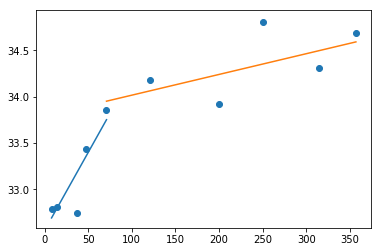

In [67]:
plt.scatter(x=dists,y=temps)
plt.plot(X_predict,y_)
plt.plot(X2_predict,y2_)

查看最低温度与海洋距离的关系

最低湿度与海洋距离的关系

最高湿度与海洋距离的关系

平均湿度与海洋距离的关系

思考：模仿最高温度，得到平均湿度与海洋距离的回归曲线

风速与风向的关系

In [91]:
ferrara['wind_deg'].min()
ferrara['wind_deg'].max()

293.0

<BarContainer object of 68 artists>

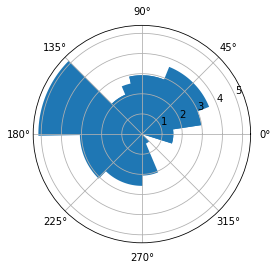

In [99]:
ferrara['wind_deg']  # 风向
ferrara['wind_speed']  # 风速
# plt.scatter(x=ferrara['wind_deg'],y=ferrara['wind_speed'])
plt.axes(polar=True)
# ferrara['wind_deg']用的是角度
# 极坐标用的是弧度
# 360 = 2*np.pi
# 弧度/(2*np.pi)=角度/360
# 弧度=角度*np.pi/180
plt.bar(x=ferrara['wind_deg']*np.pi/180,height=ferrara['wind_speed'])

在子画布中，同时比较 湿度和风力 与 风向 的关系

In [102]:
ferrara['humidity']

0     60
1     58
2     54
3     50
4     49
5     48
6     49
7     49
8     50
9     52
10    58
11    65
12    67
13    72
14    75
15    76
16    77
17    77
18    74
19    85
20    71
21    62
22    71
23    57
24    49
25    45
26    42
27    42
28    42
29    42
      ..
38    70
39    68
40    70
41    73
42    74
43    74
44    68
45    65
46    58
47    55
48    74
49    66
50    58
51    48
52    43
53    39
54    40
55    42
56    47
57    50
58    54
59    75
60    76
61    78
62    81
63    81
64    83
65    84
66    82
67    76
Name: humidity, Length: 68, dtype: int64

Text(0.5,1,'deg-spe')

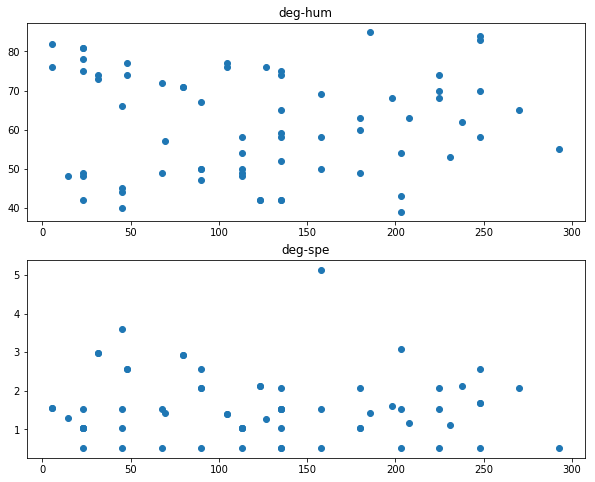

In [111]:
plt.figure(figsize=(10,8))
axes1 = plt.subplot(2,1,1)
axes2 = plt.subplot(2,1,2)
axes1.scatter(x=ferrara['wind_deg'],y=ferrara['humidity'])
axes2.scatter(x=ferrara['wind_deg'],y=ferrara['wind_speed'])
axes1.set_title('deg-hum')
axes2.set_title('deg-spe')

可以看到散点图显示效果不好

由于风向是360度，我们可以考虑使用玫瑰图（极坐标条形图）

首先自定义一个画图函数

用numpy创建一个直方图，将360度划分为8个单元，将数据分类到这8个单元中

In [124]:
index2 = np.arange(0,2*np.pi,2*np.pi/8)
index2

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714])

In [114]:
index = np.arange(0,360,360/8)
index

array([  0.,  45.,  90., 135., 180., 225., 270., 315.])

In [ ]:
# 因为wind_deg里面是角度 从里面取值也得按照角度去取 所以现在角度也要分八份

In [112]:
ferrara['wind_deg']  # 这个是角度

0     180.00000
1     135.00000
2     113.00000
3      90.00000
4      68.00000
5     113.00000
6     113.00000
7     180.00000
8      90.00000
9     135.00000
10    113.00000
11    135.00000
12     90.00000
13     68.00000
14    135.00000
15    104.50100
16    104.50100
17     48.00330
18     48.00330
19    185.50300
20     79.50130
21    238.00100
22     79.50130
23     69.50090
24     23.00000
25     45.00000
26    123.00300
27    123.00300
28     23.00000
29    135.00000
        ...    
38    225.00000
39    198.00200
40    248.00000
41     31.50360
42     31.50360
43    225.00000
44    225.00000
45    270.00000
46    248.00000
47    293.00000
48    135.00000
49     45.00000
50    158.00000
51     14.50020
52    203.00000
53    203.00000
54     45.00000
55    135.00000
56     90.00000
57    113.00000
58    203.00000
59     23.00000
60    126.51500
61     23.00000
62     23.00000
63     23.00000
64    248.00300
65    248.00300
66      5.50055
67      5.50055
Name: wind_deg, Length: 

In [119]:
(ferrara.wind_deg>0)&(ferrara.wind_deg<45)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28     True
29    False
      ...  
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51     True
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59     True
60    False
61     True
62     True
63     True
64    False
65    False
66     True
67     True
Name: wind_deg, Length: 68, dtype: bool

In [120]:
ferrara.wind_speed[(ferrara.wind_deg>0)&(ferrara.wind_deg<45)]

24    1.03
28    0.51
31    1.54
41    2.97
42    2.97
51    1.29
59    1.03
61    1.03
62    1.03
63    1.03
66    1.56
67    1.56
Name: wind_speed, dtype: float64

In [122]:
ferrara.wind_deg.max()

293.0

In [121]:
ferrara.wind_speed[(ferrara.wind_deg>0)&(ferrara.wind_deg<45)].mean()

1.4625000000000001

In [123]:
# 按照index的范围 去wind_speed里面取值 并求平均值
speeds = []
for i in index[:]:
    # print(i,'-',i+45)  #这个是角度的范围
    # (ferrara.wind_deg>i)&(ferrara.wind_deg<i+45) 这个是条件
    # ferrara.wind_speed[条件] 就可以把符要求的值取出
    avg_speed = ferrara.wind_speed[(ferrara.wind_deg>i)&(ferrara.wind_deg<i+45)].mean()
    #print(avg_speed)
    if np.isnan(avg_speed):
        avg_speed = 0
    speeds.append(avg_speed)

speeds

[1.4625000000000001,
 2.064285714285714,
 1.297,
 2.3966666666666665,
 1.5533333333333335,
 1.6166666666666665,
 0.51,
 0]

<BarContainer object of 8 artists>

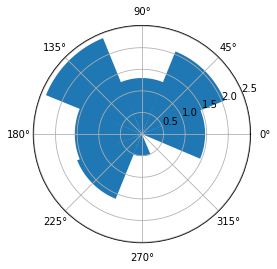

In [125]:
plt.axes(polar=True)
plt.bar(x=index2,height=speeds)

将各个方向范围的平均风速保存在列表中

画出各个方向的风速

将上面步骤写成函数

In [133]:
def draw_polar(A,B,title):
    speeds = []
    index = np.arange(0,360,360/8)
    for i in index[:]:
        avg_speed = B[(A>i)&(A<i+45)].mean()
        #print(avg_speed)
        if np.isnan(avg_speed):
            avg_speed = 0
        speeds.append(avg_speed)
        
    plt.figure(figsize=(8,8))
    plt.axes(polar=True)
    index2 = np.arange(0,2*np.pi,2*np.pi/8)
    plt.bar(x=index2,height=speeds)
    plt.title(title)



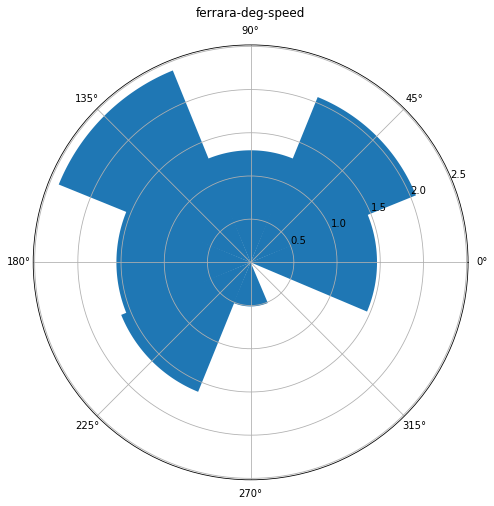

In [134]:
draw_polar(ferrara.wind_deg,ferrara.wind_speed,'ferrara-deg-speed')

展示米兰 风速 和 风向 的关系以及 湿度 和 风向 的关系

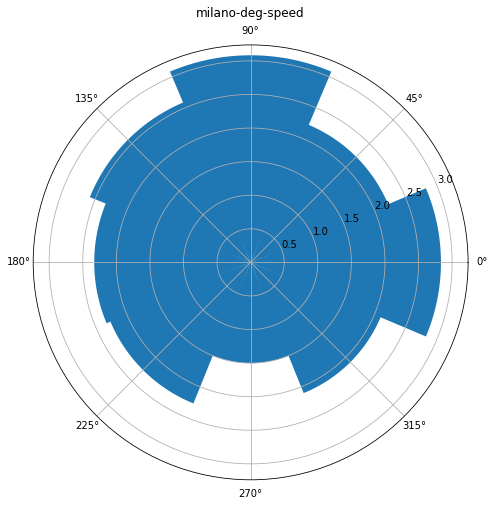

In [135]:
draw_polar(milano.wind_deg,milano.wind_speed,'milano-deg-speed')

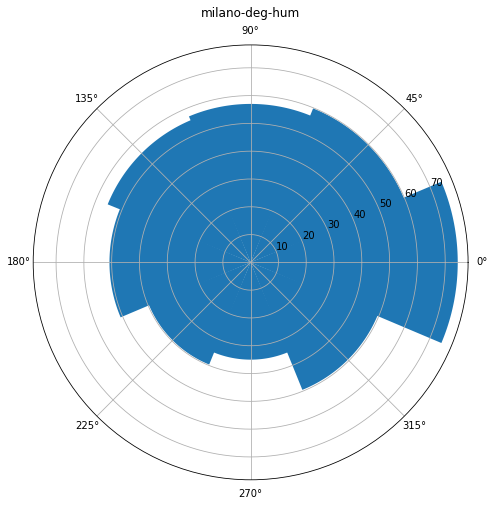

In [136]:
draw_polar(milano.wind_deg,milano.humidity,'milano-deg-hum')